# BookMe - Churn prediction

# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1. Import the data](#import)
* [2. Explore the data](#explore)
* [3. Prepare the data](#prepare)
    * [3. Feature Engineering](#feateng)
    * [4. Feature Selection](#feateng)
* [5. Model Assessment](#assess)
* [6. Predictions](#pred)

# 1. Import the data <a class="anchor" id="import"></a>
[Back to Contents](#toc)

<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

__`Step 1`__ Import all the needed packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
# Feature Selection
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Model Assessment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

__`Step 2`__ Import the dataset.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Cust_ID,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,...,1,2,1,1,5,3,4,4,4,1
1,30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,...,4,2,4,4,4,5,4,3,1,4
2,30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,...,2,4,1,2,5,5,5,3,4,2
3,30003,Mr. Robert Henderson,yes,1986,leisure,double,5297,4,5,4,...,3,4,3,3,3,5,5,3,4,3
4,30004,Ms. Stephanie Drake,yes,1970,business,double,6047,4,2,2,...,5,4,3,4,4,4,4,4,4,4


`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict churn for BookMe clientele

`Name` : customer's name <br>
`Year_Birth` : customer's birth year <br>
`Longevity` : Whether the customer registered more than 1 year ago or not (yes or no) <br>
`Churn`: Whether the customer churned or not (churn or nochurn) <br>
`TypeTravel` : Customer’s reason for travelling (business or leisure) <br>
`RoomType`: Type of room reserved <br>
`RewardPoints`: Customer’s rewarding point for loyalty <br>
`Comfort`: Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`ReceptionSchedule`: Satisfaction level of customer regarding reception schedule (0 to 5) <br>
`FoodDrink`: Satisfaction level of customer regarding food and drink available (0 to 5) <br>
`Location`: Satisfaction level of customer regarding accommodation location (0 to 5) <br>
`Wifi`: Satisfaction level of customer regarding wi-fi service (0 to 5) <br>
`Amenities`: Satisfaction level of customer regarding accommodation amenities (0 to 5) <br>
`Staff`: Satisfaction level of customer regarding accommodation amenities (0 to 5) <br>
`OnlineBooking`: Satisfaction level of customer regarding online booking ease (0 to 5) <br>
`PriceQuality`: Satisfaction level of customer regarding price quality relationship (0 to 5) <br>
`RoomSpace`: Satisfaction level of customer regarding room space (0 to 5) <br>
`CheckOut` : Satisfaction level of customer regarding check-out (0 to 5) <br>
`CheckIn` : Satisfaction level of customer regarding check-in (0 to 5) <br>
`Cleanliness` : Satisfaction level of customer regarding cleanliness (0 to 5) <br>
`BarService` : Satisfaction level of customer regarding bar service (0 to 5)

# 2. Explore the data <a class="anchor" id="explore"></a>
[Back to Contents](#toc)

__`Step 3`__ Identify duplicate entries and drop them.

In [4]:
df[df.duplicated()]

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


In [5]:
test[test.duplicated()]

,Cust_ID,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


__`Step 4`__ Define the variable `Cust_ID` as the new index

In [6]:
df.set_index('Cust_ID', inplace = True)
test.set_index('Cust_ID', inplace = True)

__`Step 5`__ Basic exploration

In [7]:
df.shape

(15589, 21)

The train dataset has 15,589 rows and 21 columns.

In [8]:
test.shape

(5195, 20)

The test dataset has 5,195 rows and 20 columns.

__`Step 6`__ Check the column names.

In [9]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [10]:
test.columns

Index(['Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

__`Step 7`__ Check the first and last 3 columns of our datasets.

In [11]:
df.head(3)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1


In [12]:
df.tail(3)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
15587,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15588,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5
15589,churn,Mr. Steven Mendez,yes,1983.0,business,suite,5136,3,3,3,...,3,3,3,3,4,5,4,1,3,3


In [13]:
test.head(3)

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,2,1,2,1,1,5,3,4,4,4,1
30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,1,4,2,4,4,4,5,4,3,1,4
30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,3,2,4,1,2,5,5,5,3,4,2


In [14]:
test.tail(3)

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,
35192,Mr. Michael Webb,yes,1954,business,double,5373,3,1,1,1,3,3,3,3,3,4,4,1,3,3
35193,Mr. Nathan Ray,yes,1978,leisure,double,4356,1,5,0,3,5,0,5,5,3,3,4,5,4,5
35194,Mr. Kristopher Acosta,yes,1981,business,single,3635,1,1,1,1,3,4,4,5,5,5,5,5,5,4


__`Step 8`__ Explore and get insights from the data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

We have verified the following:
- 1 float variable
- 15 integer variables
- 5 object variables

There are missing values in the `Year_Birth` variable.

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5195 entries, 30000 to 35194
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               5195 non-null   object
 1   Longevity          5195 non-null   object
 2   Year_Birth         5195 non-null   int64 
 3   TypeTravel         5195 non-null   object
 4   RoomType           5195 non-null   object
 5   RewardPoints       5195 non-null   int64 
 6   Comfort            5195 non-null   int64 
 7   ReceptionSchedule  5195 non-null   int64 
 8   FoodDrink          5195 non-null   int64 
 9   Location           5195 non-null   int64 
 10  Wifi               5195 non-null   int64 
 11  Amenities          5195 non-null   int64 
 12  Staff              5195 non-null   int64 
 13  OnlineBooking      5195 non-null   int64 
 14  PriceQuality       5195 non-null   int64 
 15  RoomSpace          5195 non-null   int64 
 16  CheckOut           5195 non-null   in

We have verified the following:
- 16 integer variables
- 4 object variables

There are no missing values.

__`Step 9`__ Get the main descriptive statistics for the numerical data.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0


From the above table, we are able to get some conclusions:
- `count`- The Year_Birth variable has only 15,394 valid values. There are 195 missing values.
- `mean`- In average, customers' satisfaction level is 3.
- `std`- The standard deviation of RewardPoints is quite high. This indicates that the values are spread out over a wider range.
- `min`- Various services were rated with level 0, except for Location, Staff, PriceQuality, CheckOut, Checkin and Cleanliness.
- `50%`- 50% of customers have rated with 4 some crucial services: Amenities, Staff, OnlineBooking, PriceQuality, RoomSpace, CheckOut and Cleanliness. 50% of customers have 41 years old.
- `max`- The maximum rate value for Wifi is 6. This is an incoherence that we will need to address - according to the business needs, the range is between 0 and 5. Also, all services have been rated with 5, at least once.

In [18]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,5195.0,1981.590375,15.171122,1941.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,5195.0,5031.689509,1026.748250,49.0,4491.0,5088.0,5640.5,6950.0
Comfort,5195.0,2.850626,1.384223,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,5195.0,3.006930,1.518196,0.0,2.0,3.0,4.0,5.0
FoodDrink,5195.0,2.884119,1.436115,0.0,2.0,3.0,4.0,5.0
Location,5195.0,3.018094,1.306090,0.0,2.0,3.0,4.0,5.0
Wifi,5195.0,3.265063,1.307542,0.0,2.0,3.0,4.0,5.0
Amenities,5195.0,3.388258,1.341690,0.0,2.0,4.0,4.0,5.0
Staff,5195.0,3.531473,1.303531,1.0,3.0,4.0,5.0,5.0
OnlineBooking,5195.0,3.476420,1.298073,0.0,3.0,4.0,5.0,5.0


From the above table, we are able to get some conclusions:
- `count`- There are 5,195 valid entries without missing values.
- `mean`- In average, customers' satisfaction level is 3, however for ´Comfort´ and ´FoodDrink´ is lower.
- `std`- The standard deviation of RewardPoints is quite high. This indicates that the values are spread out over a wider range.
- `min`- Various services were rated with level 0, except for Staff, PriceQuality, CheckOut, Checkin and Cleanliness.
- `50%`- 50% of customers have rated with 4 some crucial services: Amenities, Staff, OnlineBooking, PriceQuality, RoomSpace, CheckOut and Cleanliness. 50% of customers have 41 years old.
- `max`- All services have been rated with 5, at least once.

__`Step 10`__ Calculate the skweness.

In [19]:
df.skew()

Year_Birth          -0.003847
RewardPoints        -0.453779
Comfort             -0.100907
ReceptionSchedule   -0.260705
FoodDrink           -0.123610
Location            -0.050229
Wifi                -0.171255
Amenities           -0.599498
Staff               -0.554561
OnlineBooking       -0.472074
PriceQuality        -0.503381
RoomSpace           -0.482952
CheckOut            -0.750689
Checkin             -0.382588
Cleanliness         -0.745131
BarService          -0.358297
dtype: float64

Concerning the variables skewness, we were able to conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Amenities, Staff, PriceQuality, CheckOut, Cleanliness
- `High skewness (higher than |1.0|)`: None

__`Step 11`__ Calculate the kurtosis.

In [20]:
df.kurt()

Year_Birth          -0.729800
RewardPoints         0.260135
Comfort             -0.935544
ReceptionSchedule   -1.077243
FoodDrink           -0.967047
Location            -1.076583
Wifi                -1.111251
Amenities           -0.540657
Staff               -0.858889
OnlineBooking       -0.931811
PriceQuality        -0.772663
RoomSpace           -0.864644
CheckOut            -0.225016
Checkin             -0.812149
Cleanliness         -0.225183
BarService          -0.949765
dtype: float64

High kurtosis in a data set is an indicator that data has heavy tails or outliers. A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers.
We have to check further this variable for the presence of possible outliers. However, there are no plausible indication that the variables with higher skweness have outliers.

__`Step 12`__ Get the main descriptive statistics for categorical data.

In [21]:
df.describe(include='O')

,Churn,Name,Longevity,TypeTravel,RoomType
count,15589,15589,15589,15589,15589
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8477,9,12548,10756,7442


As per the above table we are able to get some conclusions:
- There were 3 possible values for Longevity, when only 2 are valid (yes or no). This will require more investigation;
- The variable Name can be used to create a new variable called ´Gender´, based on the prefixes (´Mr.´ or ´Mrs.´);
- There are no unary variables;
- There are no missing values.

Other conclusions:
- More than 50% of customers are in a nochurn situation;
- Around 80% of clients are registered in BookMe platform for 1 year or more;
- Almost 70% of customers use this hospitality platform while travelling in business;
- Close to 48% of customers book single room.

In [22]:
test.describe(include='O')

,Name,Longevity,TypeTravel,RoomType
count,5195,5195,5195,5195
unique,4999,2,2,3
top,Mr. Michael Williams,yes,business,single
freq,6,4267,3512,2398


As per the above table we are able to get some conclusions:
- The variable Name can be used to create a new variable called ´Gender´, based on the prefixes (´Mr.´ or ´Mrs.´);
- There are no unary variables;
- There are no missing values.

Other conclusions:
- Around 80% of clients are registered in BookMe platform for 1 year or more;
- Almost 70% of customers use this hospitality platform while travelling in business;
- Close to 46% of customers book single rooms.

__`Step 13`__ Check the possible values for each categorical variable.

In [23]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

`yes` and `y` represent the same conclusion. We will need to combine both values into one single category.

In [24]:
test['Longevity'].value_counts()

yes    4267
no      928
Name: Longevity, dtype: int64

In [25]:
df['Churn'].value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

In [26]:
df['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

In [27]:
test['TypeTravel'].value_counts()

business    3512
leisure     1683
Name: TypeTravel, dtype: int64

In [28]:
df['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

In [29]:
test['RoomType'].value_counts()

single    2398
double    2392
suite      405
Name: RoomType, dtype: int64

__`Step 14`__ Create visualizations which might provide us more details about the target `Churn`.

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

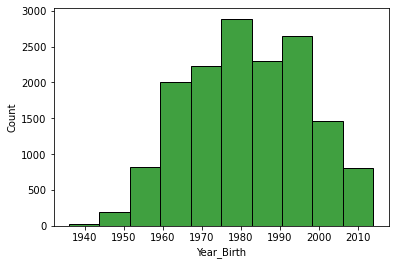

In [30]:
sns.histplot(df['Year_Birth'], color = 'g', bins = 10)

The `Year_Birth` variable has low skeweness. The mean and median values are very similar. This information will help us selecting the method for filling in the missing values.

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

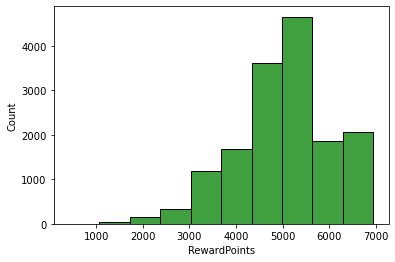

In [31]:
sns.histplot(df['RewardPoints'], color = 'g', bins = 10)

The `RewardPoints` variable has some skweness. Maybe we can try to transform this variable, so we could normalize the distribution a little bit.

<AxesSubplot:xlabel='RewardPoints', ylabel='Year_Birth'>

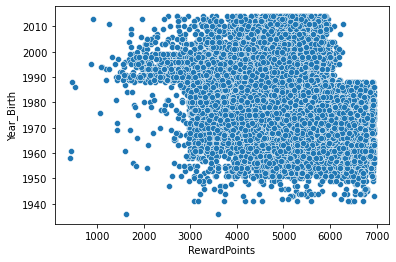

In [32]:
sns.scatterplot(x = 'RewardPoints', y= 'Year_Birth', data = df)

The older customers have more points than the young ones.

<AxesSubplot:xlabel='RewardPoints', ylabel='Year_Birth'>

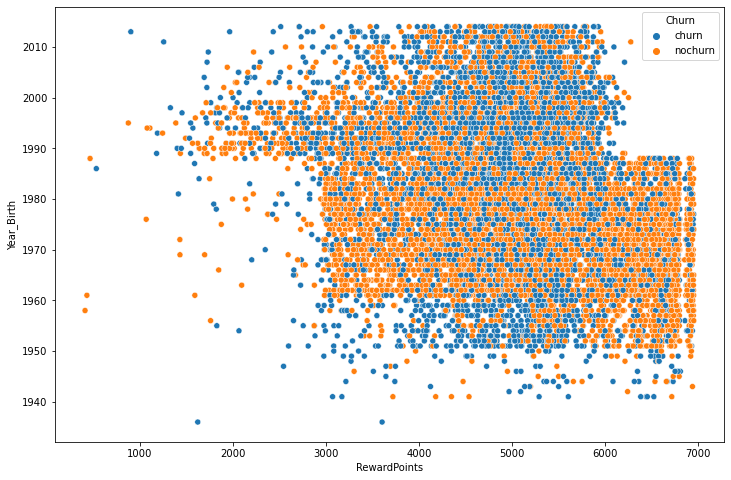

In [33]:
figure = plt.figure(figsize=(12,8))
ax = plt.subplot(111) #  "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
sns.scatterplot(x = 'RewardPoints', y = 'Year_Birth', data = df, hue = 'Churn')

We can't really find a pattern to explain churn based on age and reward points.

<AxesSubplot:xlabel='Comfort', ylabel='Churn'>

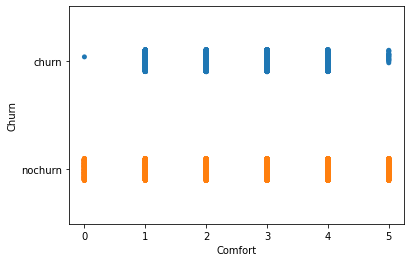

In [34]:
sns.stripplot(x = 'Comfort', y = 'Churn', data = df)

<AxesSubplot:xlabel='ReceptionSchedule', ylabel='Churn'>

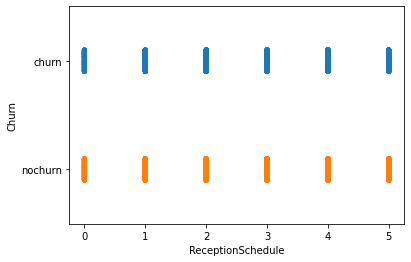

In [35]:
sns.stripplot(x = 'ReceptionSchedule', y = 'Churn', data = df)

<AxesSubplot:xlabel='FoodDrink', ylabel='Churn'>

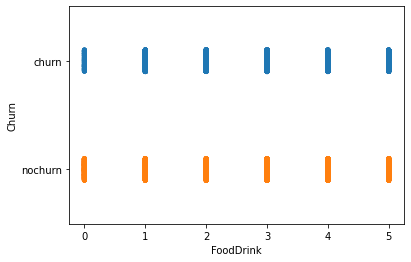

In [36]:
sns.stripplot(x = 'FoodDrink', y = 'Churn', data = df)

<AxesSubplot:xlabel='Location', ylabel='Churn'>

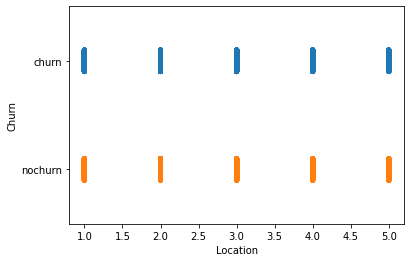

In [37]:
sns.stripplot(x = 'Location', y = 'Churn', data = df)

<AxesSubplot:xlabel='Wifi', ylabel='Churn'>

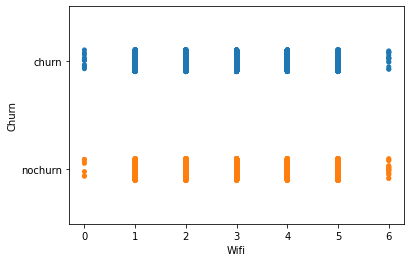

In [38]:
sns.stripplot(x = 'Wifi', y = 'Churn', data = df)

<AxesSubplot:xlabel='Amenities', ylabel='Churn'>

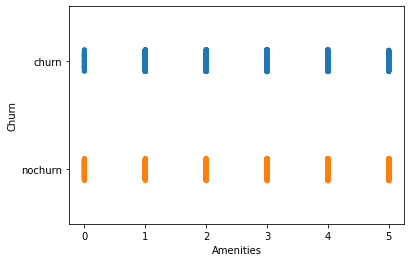

In [39]:
sns.stripplot(x = 'Amenities', y = 'Churn', data = df)

<AxesSubplot:xlabel='Staff', ylabel='Churn'>

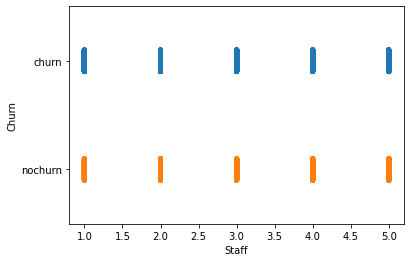

In [40]:
sns.stripplot(x = 'Staff', y = 'Churn', data = df)

<AxesSubplot:xlabel='OnlineBooking', ylabel='Churn'>

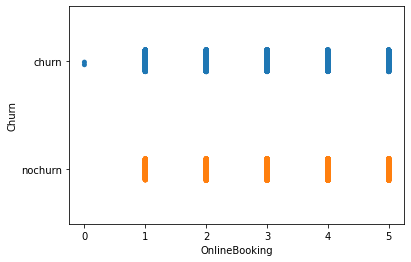

In [41]:
sns.stripplot(x = 'OnlineBooking', y = 'Churn', data = df)

<AxesSubplot:xlabel='Checkin', ylabel='Churn'>

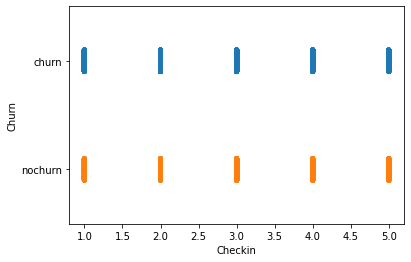

In [42]:
sns.stripplot(x = 'Checkin', y = 'Churn', data = df)

<AxesSubplot:xlabel='CheckOut', ylabel='Churn'>

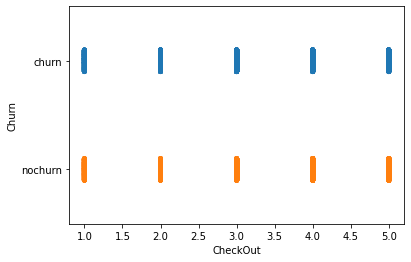

In [43]:
sns.stripplot(x = 'CheckOut', y = 'Churn', data = df)

<AxesSubplot:xlabel='Cleanliness', ylabel='Churn'>

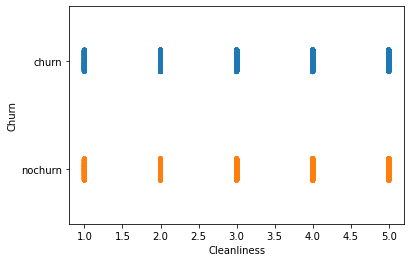

In [44]:
sns.stripplot(x = 'Cleanliness', y = 'Churn', data = df)

<AxesSubplot:xlabel='PriceQuality', ylabel='Churn'>

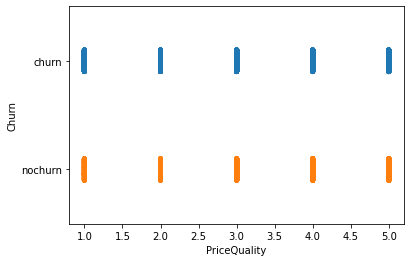

In [45]:
sns.stripplot(x = 'PriceQuality', y = 'Churn', data = df)

<AxesSubplot:xlabel='RoomSpace', ylabel='Churn'>

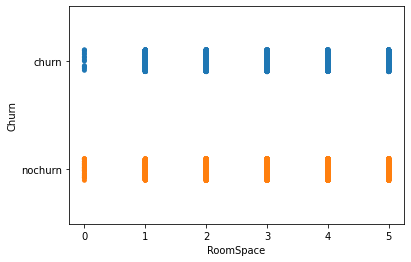

In [46]:
sns.stripplot(x = 'RoomSpace', y = 'Churn', data = df)

<AxesSubplot:xlabel='BarService', ylabel='Churn'>

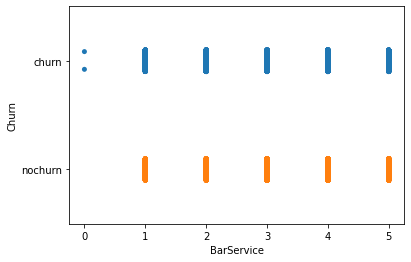

In [47]:
sns.stripplot(x = 'BarService', y = 'Churn', data = df)

We can really find a connection between the evaluation of each service provided and the churn.

<AxesSubplot:xlabel='count', ylabel='Longevity'>

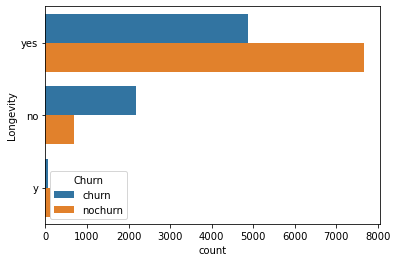

In [48]:
sns.countplot(y = 'Longevity', hue = 'Churn', data = df)

As per the above chart, we can see that clients more recent clients (registered for less than 1 year) have a higher ratio of churn cases than nochurn.

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

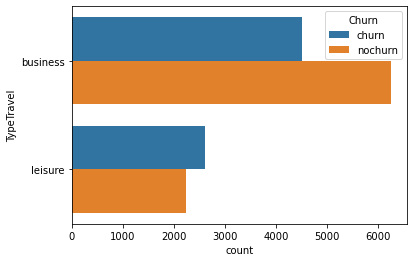

In [49]:
sns.countplot(y = 'TypeTravel', hue = 'Churn', data = df)

The same happens with leisure type of travel, for which the ratio of churn is higher, when compared with customers travelling in business.

<AxesSubplot:xlabel='count', ylabel='RoomType'>

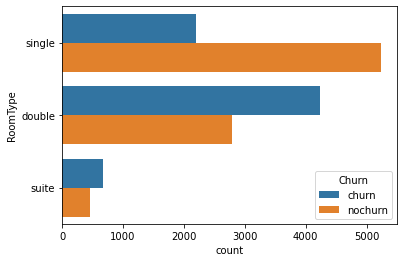

In [50]:
sns.countplot(y = 'RoomType', hue = 'Churn', data = df)

Again, the same situation happening with room type. Generally there is more churn in clients booking double rooms, but clients that book suites also have a higher churn ratio.

In [51]:
df.query('Churn == "churn"').groupby('Longevity')['RewardPoints'].median()

Longevity
no     5053.0
y      4852.0
yes    5068.0
Name: RewardPoints, dtype: float64

Clients with churn are the ones with more longevity and reward points.

__`Step 15`__ Look for outliers.

<AxesSubplot:xlabel='Staff'>

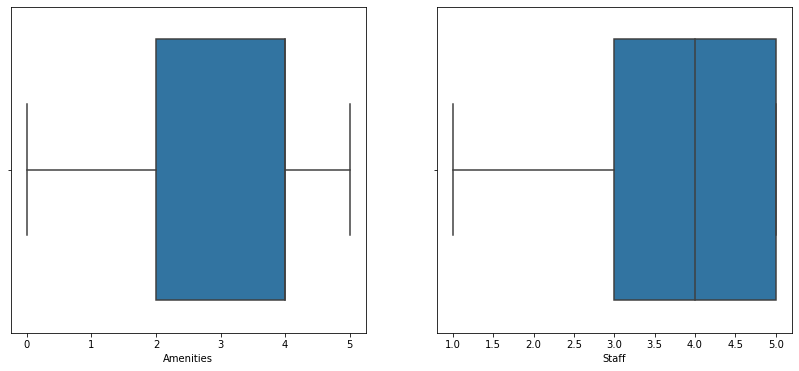

In [52]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'Amenities')
sns.boxplot(ax = axes[1], data = df, x = 'Staff')

<AxesSubplot:xlabel='CheckOut'>

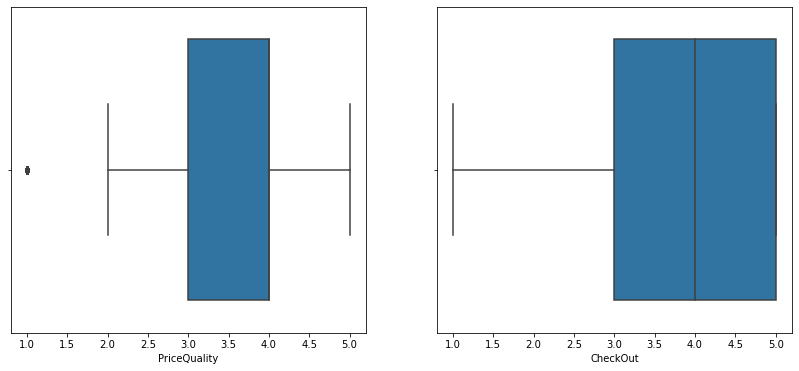

In [53]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'PriceQuality')
sns.boxplot(ax = axes[1], data = df, x = 'CheckOut')

<AxesSubplot:xlabel='Cleanliness'>

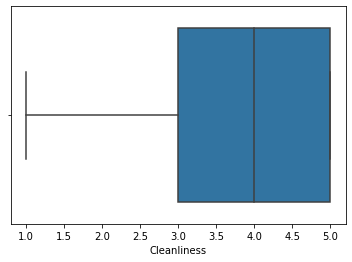

In [54]:
sns.boxplot( data = df, x = 'Cleanliness')

<AxesSubplot:xlabel='Staff', ylabel='Count'>

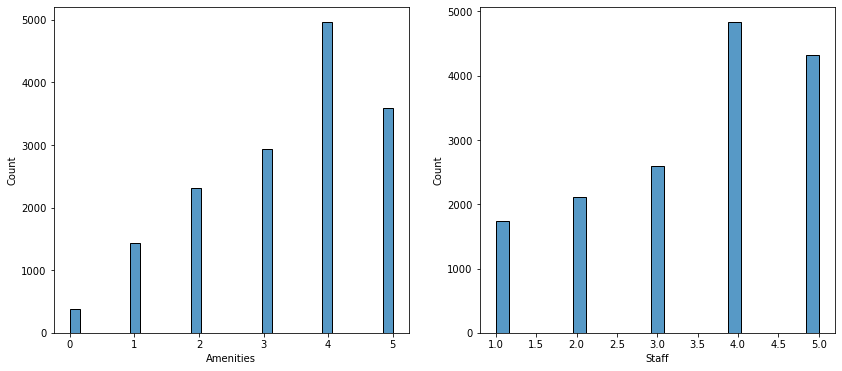

In [55]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Amenities')
sns.histplot(ax = axes[1], data = df, x = 'Staff')

<AxesSubplot:xlabel='CheckOut', ylabel='Count'>

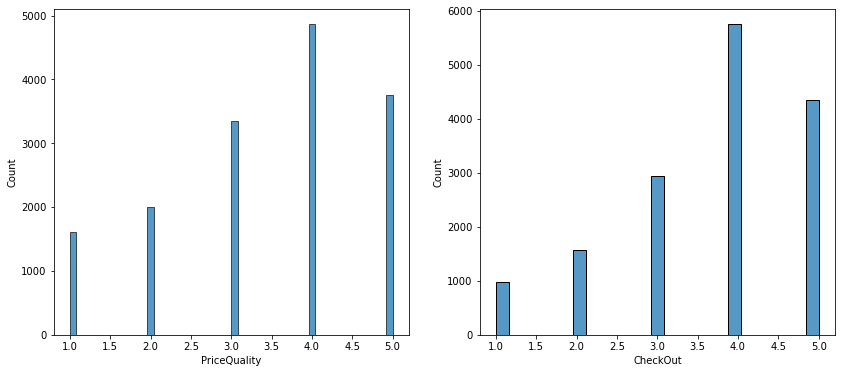

In [56]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'PriceQuality')
sns.histplot(ax = axes[1], data = df, x = 'CheckOut')

<AxesSubplot:xlabel='Cleanliness', ylabel='Count'>

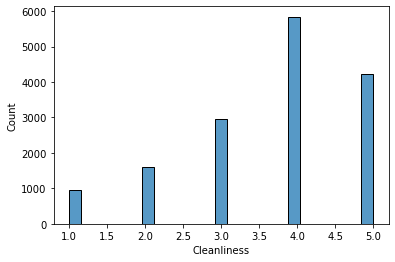

In [57]:
sns.histplot( data = df, x = 'Cleanliness')

In [58]:
print(len(df[df['PriceQuality']<2]))
print(len(df[df['PriceQuality']<2])/len(df)*100)

1610
10.327795240233497


As per the boxplot for "PriceQuality", there is an indication of potential outliers, however the values that are further away from the main distribution, represent more than 10% of our data. Based on the rule of thumb, which states that not more than 3% of the outliers should be removed, we will keep them.

# 3. Prepare the data <a class="anchor" id="prepare"></a>
[Back to Contents](#toc)

__`Step 15`__ Change the target data type to binary.

In [59]:
df['Churn'] = df['Churn'].replace('churn','1').replace('nochurn', '0')

In [60]:
df['Churn'].value_counts()

0    8477
1    7112
Name: Churn, dtype: int64

In [61]:
df['Churn'] = df['Churn'].astype('int')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  int32  
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

__`Step 15`__ Define the independent variables as __X__ and the dependent variable as __y__.

In [63]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

__`Step 16`__ Correct missclassifications.

In [64]:
X['Longevity'] = X['Longevity'].replace('y', 'yes')
X['Longevity'].value_counts()

yes    12715
no      2874
Name: Longevity, dtype: int64

In [65]:
X['Wifi'] = X['Wifi'].replace(6,5)
X['Wifi'].value_counts()

4    3704
5    3482
3    3348
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

## 3.1. Feature Engineering <a class="anchor" id="feateng"></a>

__`Step 17`__ Create new variables.

In [66]:
X['Gender'] = X['Name'].str.split(' ', expand=True)[0]
X['Gender'].value_counts()

Ms.    7985
Mr.    7604
Name: Gender, dtype: int64

In [67]:
X['Gender'] = X['Gender'].replace('Ms.', 'Female').replace('Mr.', 'Male')
X['Gender'].value_counts()

Female    7985
Male      7604
Name: Gender, dtype: int64

In [68]:
X['Gender'].describe()

count      15589
unique         2
top       Female
freq        7985
Name: Gender, dtype: object

In [69]:
test['Gender'] = test['Name'].str.split(' ', expand=True)[0]
test['Gender'].value_counts()

Ms.    2632
Mr.    2563
Name: Gender, dtype: int64

In [70]:
test['Gender'] = test['Gender'].replace('Ms.', 'Female').replace('Mr.', 'Male')
test['Gender'].value_counts()

Female    2632
Male      2563
Name: Gender, dtype: int64

In [71]:
X['Age'] = (date.today().year - X['Year_Birth'])
X['Age'].describe()

count    15394.000000
mean        40.293556
std         15.179042
min          8.000000
25%         28.000000
50%         41.000000
75%         52.000000
max         86.000000
Name: Age, dtype: float64

In [72]:
test['Age'] = (date.today().year - test['Year_Birth'])
test['Age'].describe()

count    5195.000000
mean       40.409625
std        15.171122
min         8.000000
25%        28.000000
50%        41.000000
75%        52.000000
max        81.000000
Name: Age, dtype: float64

In [73]:
X = X.drop(columns=['Name','Year_Birth'], axis=1)
test = test.drop(columns=['Name', 'Year_Birth'], axis=1)

In [74]:
#X['avg_satisfaction'] = (X['Comfort'] + X['ReceptionSchedule'] + X['FoodDrink'] + X['Location'] + X['Wifi'] + X['Amenities'] + X['Staff'] + X['OnlineBooking'] + X['PriceQuality'] + X['RoomSpace'] + X['CheckOut'] + X['Checkin'] + X['Cleanliness'] + X['BarService'])/14
#X['avg_satisfaction'].describe()

In [75]:
#test['avg_satisfaction'] = (test['Comfort'] + test['ReceptionSchedule'] + test['FoodDrink'] + test['Location'] + test['Wifi'] + test['Amenities'] + test['Staff'] + test['OnlineBooking'] + test['PriceQuality'] + test['RoomSpace'] + test['CheckOut'] + test['Checkin'] + test['Cleanliness'] + test['BarService'])/14
#test['avg_satisfaction'].describe()

In [76]:
#X['Accommodation'] = (X['Comfort'] + X['Amenities'] + X['RoomSpace'] + X['Cleanliness'] + X['Wifi'])/5
#X['Accommodation'].describe()

In [77]:
#test['Accommodation'] = (test['Comfort'] + test['Amenities'] + test['RoomSpace'] + test['Cleanliness'] + test['Wifi'])/5
#test['Accommodation'].describe()

In [78]:
#X['Reception'] = (X['ReceptionSchedule'] + X['Staff'] + X['OnlineBooking'] + X['CheckOut'] + X['Checkin'])/5
#X['Reception'].describe()

In [79]:
#test['Reception'] = (test['ReceptionSchedule'] + test['Staff'] + test['OnlineBooking'] + test['CheckOut'] + test['Checkin'])/5
#test['Reception'].describe()

In [80]:
#X['Catering'] = (X['FoodDrink'] + X['BarService'])/2
#X['Catering'].describe()

In [81]:
#test['Catering'] = (test['FoodDrink'] + test['BarService'])/2
#test['Catering'].describe()

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          15589 non-null  object 
 1   TypeTravel         15589 non-null  object 
 2   RoomType           15589 non-null  object 
 3   RewardPoints       15589 non-null  int64  
 4   Comfort            15589 non-null  int64  
 5   ReceptionSchedule  15589 non-null  int64  
 6   FoodDrink          15589 non-null  int64  
 7   Location           15589 non-null  int64  
 8   Wifi               15589 non-null  int64  
 9   Amenities          15589 non-null  int64  
 10  Staff              15589 non-null  int64  
 11  OnlineBooking      15589 non-null  int64  
 12  PriceQuality       15589 non-null  int64  
 13  RoomSpace          15589 non-null  int64  
 14  CheckOut           15589 non-null  int64  
 15  Checkin            15589 non-null  int64  
 16  Cleanliness        155

In [83]:
X['RewardPoints'] = X['RewardPoints'].astype('int')
X['Comfort'] = X['Comfort'].astype('int')
X['ReceptionSchedule'] = X['ReceptionSchedule'].astype('int')
X['FoodDrink'] = X['FoodDrink'].astype('int')
X['Location'] = X['Location'].astype('int')
X['Wifi'] = X['Wifi'].astype('int')
X['Amenities'] = X['Amenities'].astype('int')
X['Staff'] = X['Staff'].astype('int')
X['OnlineBooking'] = X['OnlineBooking'].astype('int')
X['PriceQuality'] = X['PriceQuality'].astype('int')
X['RoomSpace'] = X['RoomSpace'].astype('int')
X['CheckOut'] = X['CheckOut'].astype('int')
X['Checkin'] = X['Checkin'].astype('int')
X['Cleanliness'] = X['Cleanliness'].astype('int')
X['BarService'] = X['BarService'].astype('int')

In [84]:
#X['avg_satisfaction'] = X['avg_satisfaction'].astype('float32')
#X['Accommodation'] = X['Accommodation'].astype('float32')
#X['Reception'] = X['Reception'].astype('float32')
#X['Catering'] = X['Catering'].astype('float32')

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          15589 non-null  object 
 1   TypeTravel         15589 non-null  object 
 2   RoomType           15589 non-null  object 
 3   RewardPoints       15589 non-null  int32  
 4   Comfort            15589 non-null  int32  
 5   ReceptionSchedule  15589 non-null  int32  
 6   FoodDrink          15589 non-null  int32  
 7   Location           15589 non-null  int32  
 8   Wifi               15589 non-null  int32  
 9   Amenities          15589 non-null  int32  
 10  Staff              15589 non-null  int32  
 11  OnlineBooking      15589 non-null  int32  
 12  PriceQuality       15589 non-null  int32  
 13  RoomSpace          15589 non-null  int32  
 14  CheckOut           15589 non-null  int32  
 15  Checkin            15589 non-null  int32  
 16  Cleanliness        155

__`Step 18`__ Split the dataset into train and validation.

In [86]:
print('Class Ratio:',
       sum(df['Churn'])/len(df['Churn']))

Class Ratio: 0.4562191288729232


In [87]:
skf = StratifiedKFold(n_splits = 7)
counter = 0
for train_index, val_index in skf.split(X, y):
    counter +=1
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [88]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(13362, 20)
(2227, 20)
(13362,)
(2227,)


In [89]:
print('Class Ratio:', sum(y_train/len(y_train)))
print('Class Ratio:', sum(y_val/len(y_val)))

Class Ratio: 0.4562191288729852
Class Ratio: 0.45621912887291904


__`Step 19`__ Fill in the missing values in `Age` and change it to int.

In [90]:
train_median_age = X_train['Age'].median()
X_train['Age'].fillna(train_median_age, inplace=True)
X_val['Age'].fillna(train_median_age, inplace=True)

In [91]:
X_train['Age'] = X_train['Age'].astype('int')
X_val['Age'] = X_val['Age'].astype('int')

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13362 entries, 1 to 13427
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Longevity          13362 non-null  object
 1   TypeTravel         13362 non-null  object
 2   RoomType           13362 non-null  object
 3   RewardPoints       13362 non-null  int32 
 4   Comfort            13362 non-null  int32 
 5   ReceptionSchedule  13362 non-null  int32 
 6   FoodDrink          13362 non-null  int32 
 7   Location           13362 non-null  int32 
 8   Wifi               13362 non-null  int32 
 9   Amenities          13362 non-null  int32 
 10  Staff              13362 non-null  int32 
 11  OnlineBooking      13362 non-null  int32 
 12  PriceQuality       13362 non-null  int32 
 13  RoomSpace          13362 non-null  int32 
 14  CheckOut           13362 non-null  int32 
 15  Checkin            13362 non-null  int32 
 16  Cleanliness        13362 non-null  int32

In [93]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 13306 to 15589
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Longevity          2227 non-null   object
 1   TypeTravel         2227 non-null   object
 2   RoomType           2227 non-null   object
 3   RewardPoints       2227 non-null   int32 
 4   Comfort            2227 non-null   int32 
 5   ReceptionSchedule  2227 non-null   int32 
 6   FoodDrink          2227 non-null   int32 
 7   Location           2227 non-null   int32 
 8   Wifi               2227 non-null   int32 
 9   Amenities          2227 non-null   int32 
 10  Staff              2227 non-null   int32 
 11  OnlineBooking      2227 non-null   int32 
 12  PriceQuality       2227 non-null   int32 
 13  RoomSpace          2227 non-null   int32 
 14  CheckOut           2227 non-null   int32 
 15  Checkin            2227 non-null   int32 
 16  Cleanliness        2227 non-null   in

__`Step 20`__ Create two separate datasets, one for the numerical data and another one for the categorical data.

In [94]:
# Numerical data
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

# Categorical data
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

__`Step 21`__ Scale the numerical data.

In [95]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [96]:
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index = X_train.index) # Convert the array to a pandas dataframe
X_train_num_scaled.head(5)

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
Cust_ID,,,,,,,,,,,,,,,,
1,0.687662,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.512821
2,0.965449,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,0.628205
3,0.604800,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.525641
4,0.525913,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0.269231
5,0.759364,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,0.320513


In [97]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns, index = X_val.index)
X_val_num_scaled.head(5)

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
Cust_ID,,,,,,,,,,,,,,,,
13306,0.825256,0.2,0.2,0.2,0.00,0.8,0.8,0.75,0.8,0.50,0.6,1.00,1.00,1.00,0.8,0.307692
13307,0.452836,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.75,0.2,0.00,0.75,0.50,1.0,0.230769
13309,0.480355,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.8,0.75,0.8,0.75,0.50,0.75,0.8,0.551282
13310,0.801101,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0,0.75,0.2,0.00,0.00,0.00,1.0,0.564103
13311,0.867451,0.8,0.8,0.8,0.75,0.8,1.0,0.75,1.0,1.00,1.0,1.00,1.00,1.00,1.0,0.448718


## 3.2. Feature Selection<a class="anchor" id="featsel"></a>

__`Step 22`__ Check if there is any univariate variable.

In [98]:
X_train_num_scaled.var()

RewardPoints         0.024826
Comfort              0.077265
ReceptionSchedule    0.092440
FoodDrink            0.082687
Location             0.105520
Wifi                 0.070369
Amenities            0.073269
Staff                0.108769
OnlineBooking        0.068500
PriceQuality         0.100412
RoomSpace            0.066761
CheckOut             0.083179
Checkin              0.101236
Cleanliness          0.082722
BarService           0.067555
Age                  0.037734
dtype: float64

There is no univariate variable to drop.

__`Step 23`__ Apply Spearman Correlation to try to identify the most important features.

In [99]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Churn
Cust_ID,,,,,,,,,,,,,,,,,
1,0.687662,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.512821,1
2,0.965449,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,0.628205,0
3,0.604800,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.525641,1
4,0.525913,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0.269231,0
5,0.759364,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,0.320513,0


__`Step 24`__ Create a heatmap to try to understand what are the most important numerical features to explain our target variable.

In [100]:
def cor_heatmap(cor):
    plt.figure(figsize=(14,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.2')
    plt.show()
cor_spearman = all_train_num.corr(method ='spearman')
cor_spearman

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Churn
RewardPoints,1.000000,0.066597,-0.007131,0.019005,0.009076,0.014704,0.046761,0.041986,0.039675,0.031169,0.034125,-0.016998,-0.014213,-0.000663,0.006968,0.237171,-0.047631
Comfort,0.066597,1.000000,0.427779,0.703915,0.401545,0.118832,0.411534,0.122523,0.196641,0.115397,0.127246,0.105852,0.065726,0.102768,0.132239,0.018585,-0.256879
ReceptionSchedule,-0.007131,0.427779,1.000000,0.532314,0.557505,-0.022441,0.060751,-0.002680,-0.012725,0.053294,0.033927,0.067230,0.069973,0.068328,-0.003646,0.045662,0.021739
FoodDrink,0.019005,0.703915,0.532314,1.000000,0.533163,0.007777,0.331817,0.025715,0.024756,0.029846,0.068612,0.018421,0.023582,0.022959,0.011577,0.019786,-0.129082
Location,0.009076,0.401545,0.557505,0.533163,1.000000,-0.019876,0.001801,0.005528,-0.002631,-0.023676,0.003223,-0.016779,-0.017645,-0.012381,-0.001615,0.006575,0.011782
Wifi,0.014704,0.118832,-0.022441,0.007777,-0.019876,1.000000,0.262981,0.527876,0.586308,0.065869,0.034505,0.057179,0.098281,0.049691,0.610171,0.019870,-0.240620
Amenities,0.046761,0.411534,0.060751,0.331817,0.001801,0.262981,1.000000,0.470521,0.338644,0.197076,0.182024,0.145182,0.246490,0.145870,0.367436,0.139464,-0.571600
Staff,0.041986,0.122523,-0.002680,0.025715,0.005528,0.527876,0.470521,1.000000,0.595158,0.161344,0.144219,0.130352,0.214781,0.111061,0.653201,0.116240,-0.417127
OnlineBooking,0.039675,0.196641,-0.012725,0.024756,-0.002631,0.586308,0.338644,0.595158,1.000000,0.461593,0.363973,0.420734,0.138416,0.441677,0.660668,0.083715,-0.440330
PriceQuality,0.031169,0.115397,0.053294,0.029846,-0.023676,0.065869,0.197076,0.161344,0.461593,1.000000,0.413933,0.541635,0.228597,0.577520,0.134339,0.081422,-0.347275


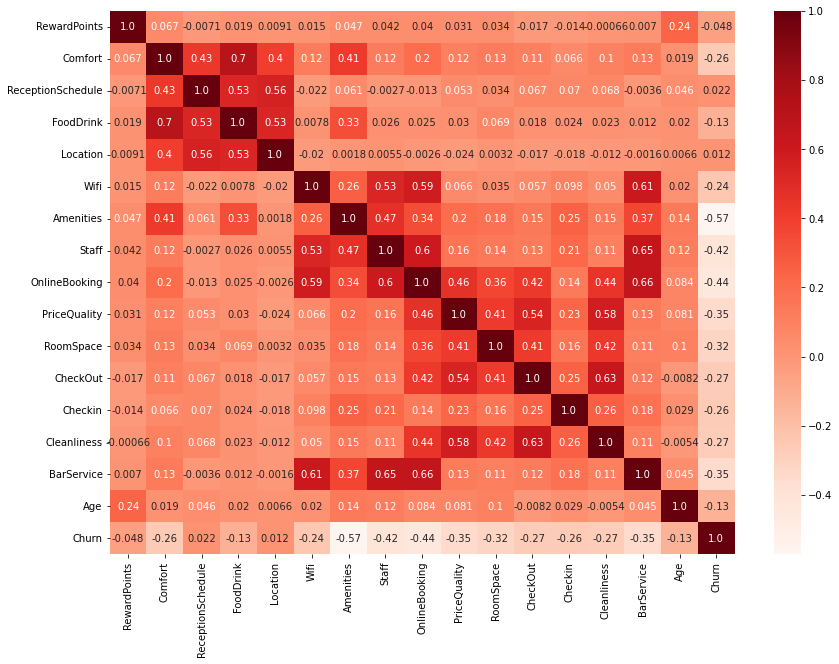

In [101]:
cor_heatmap(cor_spearman)

We can conclude that:
- There a few variables correlated with our target variable:
    - Amenities (-0.57);
    - OnlineBooking (-0.44);
    - Staff (-0.42);
    - BarService (-0.35);
    - PriceQuality (-0.35);
    - RoomSpace (-0.32);
    - Cleanliness (-0.27);
    - CheckOut (-0.27);
    - Checkin (-0.26);
    - Comfort (-0.26).
- There are a few pairs of variables also correlated, namely:
    - OnlineBooking and BarService (0.66); OnlineBooking and Staff (0.6); OnlineBooking and Wifi (0.59);
    - PriceQuality and Cleanliness (0.58); PriceQuality and CheckOut (0.54);
    - Comfort and FoodDrink (0.7).

We need to use other techniques of feature selection to decide which variables should we keep, however based only on this analysis we would keep `Amenities`, `OnlineBooking`, `PriceQuality`, `RoomSpace`, `Checkin` and `Comfort`. Because they are correlated with other features that have more impact explaining our target, we would remove `Staff`, `BarService`, `Cleanliness` and `CheckOut`.

__`Step 25`__ Use chi-squared to decide the most important categorical feautures.

In [102]:
X_train_cat.head()

,Longevity,TypeTravel,RoomType,Gender
Cust_ID,,,,
1,yes,business,single,Female
2,yes,business,single,Male
3,yes,business,single,Male
4,yes,leisure,double,Female
5,yes,business,single,Male


In [103]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p < alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [104]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Longevity is IMPORTANT for Prediction
TypeTravel is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


__`Step 26`__ Evaluate the impact of each categorical variable in our target.

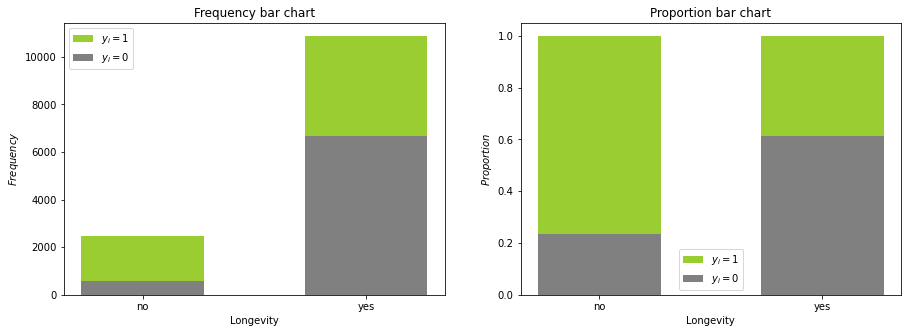

In [105]:
# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Proportion$")

    plt.show()
    
bar_charts_categorical(all_train, "Longevity", "Churn")

As seen previously the proportion of Churn agains noChurn is much higher in customer with low recency (using the platform for less than 1 year).

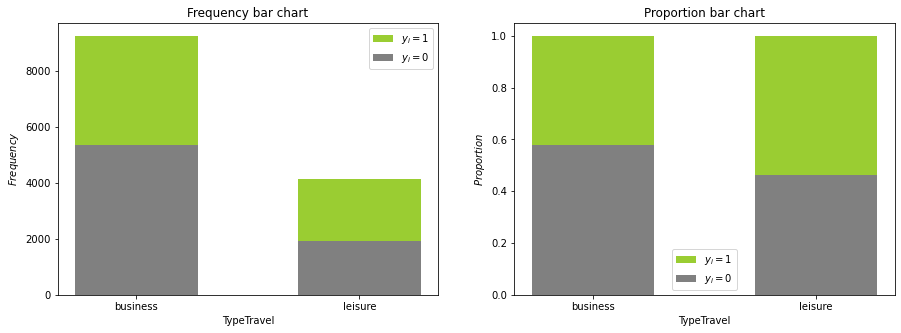

In [106]:
bar_charts_categorical(all_train, "TypeTravel", "Churn")

As seen previously the proprotion of Churn against noChurn is higher in customer that travel in leisure.

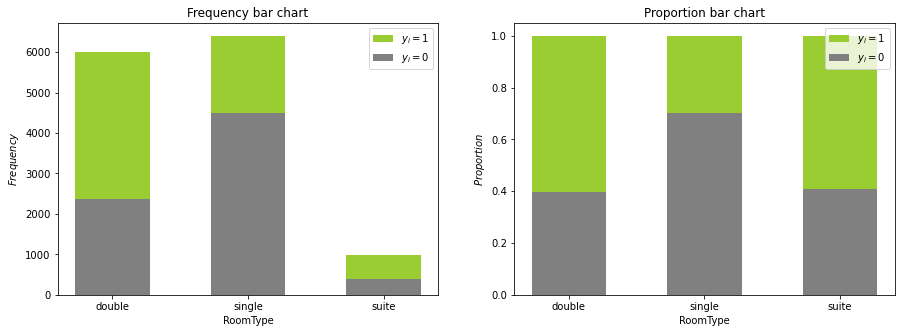

In [107]:
bar_charts_categorical(all_train, "RoomType", "Churn")

As seen previously the proportion of Churn against noChurn is much higher in clients that book double rooms and suites.

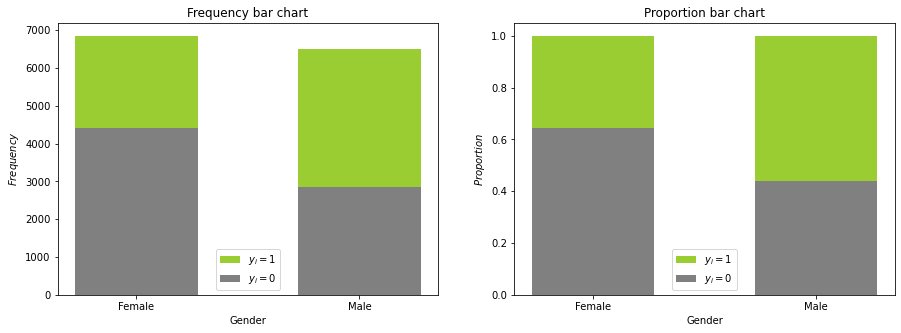

In [108]:
bar_charts_categorical(all_train, "Gender", "Churn")

As per the above graphics we seem to have more churn in males than females.

__`Step 27`__ Use RFE to try to understand the optimum number of features to explain our target variable..

In [109]:
X_train_num_scaled.shape

(13362, 16)

In [110]:
#no of features
nof_list=np.arange(1,16)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.802874


__`Step 28`__ The optimum number as per RFE is 12. Let us now check which features are those.

In [111]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 12)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

RewardPoints         False
Comfort               True
ReceptionSchedule     True
FoodDrink             True
Location              True
Wifi                  True
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut             False
Checkin               True
Cleanliness          False
BarService           False
Age                   True
dtype: bool

__`Step 30`__ 12 features is a very high number of features for a supervised model. Since from Spearman we were able to identify 6 important features, let us try use RFE again to select only 6 variables to see if they match the ones selected previously.

In [112]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 6)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

RewardPoints         False
Comfort              False
ReceptionSchedule    False
FoodDrink            False
Location             False
Wifi                 False
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut             False
Checkin               True
Cleanliness          False
BarService           False
Age                  False
dtype: bool

__`Step 31`__ Let us use Lasso CV to help us select the most important features to explain our target.

In [113]:
reg = LassoCV()
reg.fit(X=X_train_num_scaled, y=y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X = X_train_num_scaled,y = y_train))
print(coef)

Best alpha using built-in LassoCV: 0.000227
Best score using built-in LassoCV: 0.409580
RewardPoints        -0.000000
Comfort             -0.111908
ReceptionSchedule    0.135577
FoodDrink            0.110275
Location            -0.063567
Wifi                 0.059563
Amenities           -0.664668
Staff               -0.123862
OnlineBooking       -0.290536
PriceQuality        -0.195930
RoomSpace           -0.230921
CheckOut            -0.000214
Checkin             -0.145619
Cleanliness          0.001644
BarService          -0.060703
Age                 -0.077362
dtype: float64


__`Step 32`__ Let's create a for loop with 7 splits of our data set and apply all the required transformation as well as the different methods we have tried previously for feature selection and assess the results. We must do this because for each split the results can be different. This will help us select the best features for our model. We will try this loop twice: the first will include an RFE with 12 variables as per the optimum result and the second try will select only 6 features.

In [114]:
num_vars = ['RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'Age']
cat_vars = ['Longevity', 'TypeTravel', 'RoomType', 'Gender']

In [115]:
def select_best_features(X, y):
    skf = StratifiedKFold(n_splits = 7)
    counter = 0
    for train_index, val_index in skf.split(X, y):
        counter +=1
        print('')
        print('--------------------------------------------------------')
        print('SPLIT ', counter)
        print('--------------------------------------------------------')
        print('')
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # fill missing values (median in numerical data, mode in categorical data)
        median_age_train = X_train['Age'].median()
        X_train['Age'].fillna(median_age_train, inplace = True)
        X_val['Age'].fillna(median_age_train, inplace = True)
    
        # get all numerical variables
        X_train_num = X_train[num_vars]
        X_val_num = X_val[num_vars]
        
        # get all categorical variables
        X_train_cat = X_train[cat_vars]
        X_val_cat = X_val[cat_vars]
        
        # Apply scaling to numerical data
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index,) # MinMaxScaler in the training data
    
        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        model = LogisticRegression()
        rfe = RFE(estimator = model, n_features_to_select = 12)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        print(selected_features)
        
        # Check which features to use using LassoCV
        print('')
        print('----------------- LASSO ----------------------')
        reg = LassoCV()
        reg.fit(X=X_train_scaled, y=y_train)
        coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
        print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
        print("Best score using built-in LassoCV: %f" %reg.score(X = X_train_scaled,y = y_train))
        print(coef)
        
        # Check which features to use using Chi-Square
        print('')
        print('----------------- CHI-SQUARE ----------------------')
        def TestIndependence(X,y,var,alpha=0.05):        
            dfObserved = pd.crosstab(y,X) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
            if p<alpha:
                result="{0} is IMPORTANT for Prediction".format(var)
            else:
                result="{0} is NOT important for Prediction. (Discard {0} from model)".format(var)
            print(result)
        
        for var in X_train_cat:
            TestIndependence(X_train_cat[var],y_train, var)

In [116]:
select_best_features(X, y)


--------------------------------------------------------
SPLIT  1
--------------------------------------------------------


----------------- RFE ----------------------
RewardPoints         False
Comfort               True
ReceptionSchedule     True
FoodDrink             True
Location             False
Wifi                  True
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut             False
Checkin               True
Cleanliness          False
BarService            True
Age                   True
dtype: bool

----------------- LASSO ----------------------
Best alpha using built-in LassoCV: 0.000185
Best score using built-in LassoCV: 0.410107
RewardPoints        -0.000000
Comfort             -0.123496
ReceptionSchedule    0.122059
FoodDrink            0.120436
Location            -0.053332
Wifi                 0.061919
Amenities           -0.686424
Staff               -0.113119
OnlineBoo

Best alpha using built-in LassoCV: 0.000227
Best score using built-in LassoCV: 0.409580
RewardPoints        -0.000000
Comfort             -0.111908
ReceptionSchedule    0.135577
FoodDrink            0.110275
Location            -0.063567
Wifi                 0.059563
Amenities           -0.664668
Staff               -0.123862
OnlineBooking       -0.290536
PriceQuality        -0.195930
RoomSpace           -0.230921
CheckOut            -0.000214
Checkin             -0.145619
Cleanliness          0.001644
BarService          -0.060703
Age                 -0.077362
dtype: float64

----------------- CHI-SQUARE ----------------------
Longevity is IMPORTANT for Prediction
TypeTravel is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


In [117]:
def select_best_features(X, y):
    skf = StratifiedKFold(n_splits = 7)
    counter = 0
    for train_index, val_index in skf.split(X, y):
        counter +=1
        print('')
        print('--------------------------------------------------------')
        print('SPLIT ', counter)
        print('--------------------------------------------------------')
        print('')
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # fill missing values (median in numerical data, mode in categorical data)
        median_age_train = X_train['Age'].median()
        X_train['Age'].fillna(median_age_train, inplace = True)
        X_val['Age'].fillna(median_age_train, inplace = True)
    
        # get all numerical variables
        X_train_num = X_train[num_vars]
        X_val_num = X_val[num_vars]
        
        # get all categorical variables
        X_train_cat = X_train[cat_vars]
        X_val_cat = X_val[cat_vars]
        
        # Apply scaling to numerical data
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index,) # MinMaxScaler in the training data
    
        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        model = LogisticRegression()
        rfe = RFE(estimator = model, n_features_to_select = 6)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        print(selected_features)
        
        # Check which features to use using LassoCV
        print('')
        print('----------------- LASSO ----------------------')
        reg = LassoCV()
        reg.fit(X=X_train_scaled, y=y_train)
        coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
        print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
        print("Best score using built-in LassoCV: %f" %reg.score(X = X_train_scaled,y = y_train))
        print(coef)
        
        # Check which features to use using Chi-Square
        print('')
        print('----------------- CHI-SQUARE ----------------------')
        def TestIndependence(X,y,var,alpha=0.05):        
            dfObserved = pd.crosstab(y,X) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
            if p<alpha:
                result="{0} is IMPORTANT for Prediction".format(var)
            else:
                result="{0} is NOT important for Prediction. (Discard {0} from model)".format(var)
            print(result)
        
        for var in X_train_cat:
            TestIndependence(X_train_cat[var],y_train, var)

In [118]:
select_best_features(X, y)


--------------------------------------------------------
SPLIT  1
--------------------------------------------------------


----------------- RFE ----------------------
RewardPoints         False
Comfort              False
ReceptionSchedule    False
FoodDrink             True
Location             False
Wifi                 False
Amenities             True
Staff                False
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut             False
Checkin               True
Cleanliness          False
BarService           False
Age                  False
dtype: bool

----------------- LASSO ----------------------
Best alpha using built-in LassoCV: 0.000185
Best score using built-in LassoCV: 0.410107
RewardPoints        -0.000000
Comfort             -0.123496
ReceptionSchedule    0.122059
FoodDrink            0.120436
Location            -0.053332
Wifi                 0.061919
Amenities           -0.686424
Staff               -0.113119
OnlineBoo

RewardPoints         False
Comfort              False
ReceptionSchedule    False
FoodDrink            False
Location             False
Wifi                 False
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut             False
Checkin               True
Cleanliness          False
BarService           False
Age                  False
dtype: bool

----------------- LASSO ----------------------
Best alpha using built-in LassoCV: 0.000227
Best score using built-in LassoCV: 0.409580
RewardPoints        -0.000000
Comfort             -0.111908
ReceptionSchedule    0.135577
FoodDrink            0.110275
Location            -0.063567
Wifi                 0.059563
Amenities           -0.664668
Staff               -0.123862
OnlineBooking       -0.290536
PriceQuality        -0.195930
RoomSpace           -0.230921
CheckOut            -0.000214
Checkin             -0.145619
Cleanliness          0.001644


__`Step 33`__ Get the final insigths.

<hr>

### Numerical Data

| Predictor | Spearman | RFE (12 features) | RFE (6 features) | Lasso | Final Decision | 
| --- | --- | --- | --- | --- | --- |
| RewardPoints | Discard | Discard | Discard | Discard | Discard |
| Comfort | Keep | Keep | Discard | Discard | Try with and without |
| ReceptionSchedule | Keep | Keep | Discard | Keep | Keep |
| FoodDrink | Discard | Keep | Discard | Discard | Discard |
| Location | Discard | Discard | Discard | Discard | Discard |
| Wifi | Discard | Keep | Discard | Discard | Discard |
| Amenities | Keep | Keep | Keep | Keep | Keep |
| Staff | Discard | Keep | Discard | Discard | Discard |
| OnlineBooking | Keep | Keep | Keep | Keep | Keep |
| PriceQuality | Keep | Keep | Keep | Keep | Keep |
| RoomSpace | Keep | Keep | Keep | Keep | Keep |
| CheckOut | Discard | Discard | Discard | Discard | Discard |
| Checkin | Keep | Keep | Keep | Keep | Keep |
| Cleanliness | Discard | Discard | Discard | Discard | Discard |
| BarService | Discard | Discard | Discard | Discard | Discard |
| Age | Discard | Keep | Discard | Discard | Discard |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Longevity | Keep |  
| TypeTravel | Keep | 
| RoomType | Keep|
| Gender | Keep |

<hr>

__`Step 34`__ Choose the best variables to keep.

In [119]:
best_vars = ['ReceptionSchedule','Amenities','OnlineBooking','PriceQuality','RoomSpace','Checkin','Longevity','TypeTravel','RoomType', 'Gender']

# select the final features 
X_sel = X[best_vars].copy()
X_sel

,ReceptionSchedule,Amenities,OnlineBooking,PriceQuality,RoomSpace,Checkin,Longevity,TypeTravel,RoomType,Gender
Cust_ID,,,,,,,,,,
1,4,3,3,3,3,4,yes,business,single,Female
2,1,3,5,5,5,1,yes,business,single,Male
3,3,4,3,3,2,2,yes,business,single,Male
4,1,4,4,4,4,4,yes,leisure,double,Female
5,2,5,5,5,3,1,yes,business,single,Male
...,...,...,...,...,...,...,...,...,...,...
15585,0,2,3,4,5,3,no,business,double,Female
15586,3,3,5,3,1,4,no,business,double,Female
15587,1,4,4,4,4,5,yes,business,single,Male


# 5. Model Assessment<a class="anchor" id="assess"></a>
[Back to Contents](#toc)

__`Step 35`__ Create a function that compares several models using F1 Score.

In [ ]:
def compare_models(X, y, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 7)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # This time we are going to use validation to check overfitting 
        # so we need also to make all the needed changes in the validation
        
        # fill missing values (median in numerical data, mode in categorical data)
        median_age_train = X_train['Age'].median()
        X_train['Age'].fillna(median_age_train, inplace = True)
        X_val['Age'].fillna(median_age_train, inplace = True)
        
        # Create dummies and remove one of the variables (to avoid multicollinearity)
        X_train_dummies = pd.get_dummies(X_train, columns=['Longevity','TypeTravel','RoomType', 'Gender'], drop_first=True)
        X_val_dummies = pd.get_dummies(X_val, columns=['Longevity','TypeTravel','RoomType', 'Gender'], drop_first=True)
        
        # If we don't have all the values in the validation dataset that we have in the train, that column will not be created
        # We should assure that all columns in train are also present in validation
        # Get missing columns from the training dataset
        missing_cols = set(X_train_dummies.columns ) - set(X_val_dummies.columns )
        # Add a missing column in test set with default value equal to 0
        for c in missing_cols:
            X_val_dummies[c] = 0
        # Ensure the order of column in the test set is in the same order than in train set
        X_val_dummies = X_val_dummies[X_train_dummies.columns]
        
        # Data Scaling
        # Apply MinMaxScaler
        scaler = MinMaxScaler().fit(X_train_dummies)
        X_train_scaled = scaler.transform(X_train_dummies) 
        X_val_scaled = scaler.transform(X_val_dummies) # Scaling with 'scaler' from train data

        # Apply model
        model.fit(X_train_scaled, y_train)
        predictions_train = model.predict(X_train_scaled)
        predictions_val = model.predict(X_val_scaled)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)